##### confusion matrix

In [1]:
from sklearn.metrics import confusion_matrix

In [2]:
y = [2,0,2,2,0,1]
y_hat = [0,0,2,2,0,2]

In [3]:
confusion_matrix(y,y_hat)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

##### classification report

In [4]:
from sklearn.metrics import classification_report

In [5]:
y = [0,0,0,1,1,0,0]
y_hat = [0,0,0,0,1,1,1]

print(classification_report(y,y_hat))

             precision    recall  f1-score   support

          0       0.75      0.60      0.67         5
          1       0.33      0.50      0.40         2

avg / total       0.63      0.57      0.59         7



In [6]:
y = [0,0,1,1,2,2,2]
y_hat = [0,0,1,2,2,2,1]
print(classification_report(y,y_hat))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       0.50      0.50      0.50         2
          2       0.67      0.67      0.67         3

avg / total       0.71      0.71      0.71         7



##### ROC 커브

In [7]:
from sklearn.datasets import make_classification

In [9]:
x,y = make_classification(n_samples=16, n_features=2, n_informative=2, n_redundant=0, random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression().fit(x,y)

In [20]:
y_hat = model.predict(x)
function_value = model.decision_function(x) 

In [18]:
model.predict_proba(x)

array([[ 0.43912141,  0.56087859],
       [ 0.18509228,  0.81490772],
       [ 0.82148388,  0.17851612],
       [ 0.26198789,  0.73801211],
       [ 0.13453002,  0.86546998],
       [ 0.98445817,  0.01554183],
       [ 0.76007186,  0.23992814],
       [ 0.79118225,  0.20881775],
       [ 0.19031813,  0.80968187],
       [ 0.64158246,  0.35841754],
       [ 0.73648122,  0.26351878],
       [ 0.70648747,  0.29351253],
       [ 0.51574876,  0.48425124],
       [ 0.19265931,  0.80734069],
       [ 0.89799543,  0.10200457],
       [ 0.10269543,  0.89730457]])

In [19]:
model.predict(x)

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [28]:
np.hstack([function_value.reshape(-1,1), y_hat.reshape(-1,1), y.reshape(-1,1)])

array([[ 0.24472855,  1.        ,  0.        ],
       [ 1.48222034,  1.        ,  1.        ],
       [-1.52643338,  0.        ,  0.        ],
       [ 1.03566193,  1.        ,  1.        ],
       [ 1.86148532,  1.        ,  1.        ],
       [-4.14855612,  0.        ,  0.        ],
       [-1.15307353,  0.        ,  0.        ],
       [-1.33206647,  0.        ,  0.        ],
       [ 1.44794439,  1.        ,  1.        ],
       [-0.58223908,  0.        ,  0.        ],
       [-1.02775912,  0.        ,  1.        ],
       [-0.87838516,  0.        ,  0.        ],
       [-0.06301587,  0.        ,  1.        ],
       [ 1.43282233,  1.        ,  1.        ],
       [-2.17514737,  0.        ,  0.        ],
       [ 2.16762769,  1.        ,  1.        ]])

그냥 hstack으로 하면 1행으로 합쳐짐....

In [30]:
df = pd.DataFrame(np.hstack([function_value.reshape(-1,1), y_hat.reshape(-1,1), y.reshape(-1,1)]), columns=['f','y_hat','y'])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.167628,1.0,1.0
1,1.861485,1.0,1.0
2,1.482220,1.0,1.0
3,1.447944,1.0,1.0
4,1.432822,1.0,1.0
5,1.035662,1.0,1.0
6,0.244729,1.0,0.0
7,-0.063016,0.0,1.0
8,-0.582239,0.0,0.0
9,-0.878385,0.0,0.0


In [31]:
from sklearn.metrics import roc_curve

In [32]:
# fall-out, recall, threshold
# threshold를 아래와 같이 바꿀 때마다 recall과 fall-out의 변화하는 모습을 보여줌.
fpr, tpr, thresholds = roc_curve(y, model.decision_function(x))
fpr, tpr, thresholds

(array([ 0.   ,  0.   ,  0.125,  0.125,  0.375,  0.375,  1.   ]),
 array([ 0.125,  0.75 ,  0.75 ,  0.875,  0.875,  1.   ,  1.   ]),
 array([ 2.16762769,  1.03566193,  0.24472855, -0.06301587, -0.87838516,
        -1.02775912, -4.14855612]))

decision_function()을 제공하지 않는다면...아래와 같이 predict_proba()으로 적용가능

In [33]:
# 각 점이 class1에 속할 확률로 적용
fpr1, tpr1, thresholds1 = roc_curve(y, model.predict_proba(x)[:,1]) 
fpr1, tpr1, thresholds1

(array([ 0.   ,  0.   ,  0.125,  0.125,  0.375,  0.375,  1.   ]),
 array([ 0.125,  0.75 ,  0.75 ,  0.875,  0.875,  1.   ,  1.   ]),
 array([ 0.89730457,  0.73801211,  0.56087859,  0.48425124,  0.29351253,
         0.26351878,  0.01554183]))

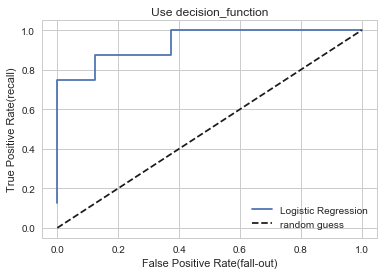

In [44]:
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1], 'k--' ,label="random guess") # 최악의 성능을 나타내는 직선
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")
plt.title("Use decision_function")
plt.legend()
plt.show()

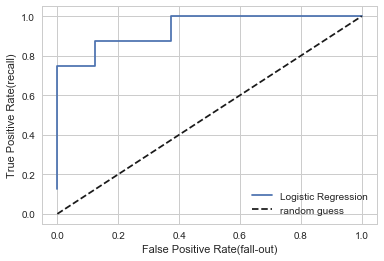

In [42]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot([0,1],[0,1], 'k--', label="random guess") # 최악의 성능을 나타내는 직선
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")
plt.title("No decision_function, Use predict_prob()")
plt.legend()
plt.show()

decision_function()을 쓰던, 없어서 predict_prob()을 쓰던

threshold값들만 다를뿐 fall-out과 recall의 변화는 같다.

##### classification report가 비슷하게 나와도  ROC커브가 다르게 나타난다?!

In [45]:
from sklearn.datasets import make_classification

In [78]:
x, y = make_classification(n_samples=10000, weights=[0.9, 0.1], random_state=1)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [48]:
model1 = LogisticRegression().fit(x,y)
y_hat1 = model1.predict(x)

model2 = SVC(gamma=0.0026, C=10, probability=True).fit(x,y)
y_hat2 = model2.predict(x)

In [49]:
print(classification_report(y,y_hat1))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8947
          1       0.87      0.62      0.73      1053

avg / total       0.95      0.95      0.95     10000



In [50]:
print(classification_report(y,y_hat2))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      8947
          1       0.93      0.62      0.74      1053

avg / total       0.95      0.95      0.95     10000



성능은 비슷하다..? 비슷한건가..

In [52]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(x))
fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(x))

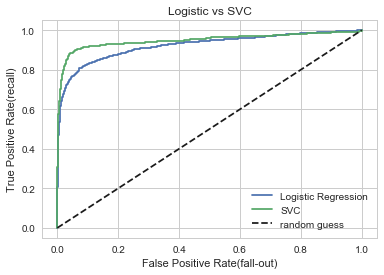

In [53]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="SVC")
plt.plot([0,1],[0,1], 'k--', label="random guess")
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")
plt.title("Logistic vs SVC")
plt.legend()
plt.show()

왼쪽/위로 더 돌출된 SVC가 더 좋은 성능을 보인다. 

report에서 비슷하게 나온건 fall-out이 0.6정도 되는 구간인듯.

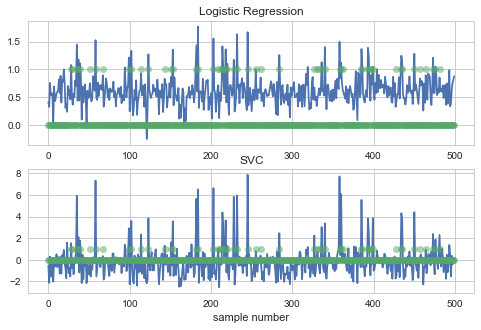

In [61]:
N = 500
plt.figure(figsize=(8,5))
plt.subplot(211)
plt.plot(model1.decision_function(x[:N]) * 0.1 + 1)
plt.plot(y[:N], 'o', alpha=0.5)
plt.title("Logistic Regression")

plt.subplot(212)
plt.plot(model2.decision_function(x[:N] + 1))
plt.plot(y[:N], 'o', alpha=0.5)
plt.title("SVC")

plt.xlabel("sample number")
plt.show()

##### AUC
- fall-out 대비 recall값이 클수록 1에 가까운 값이다. 

In [62]:
from sklearn.metrics import auc

In [64]:
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.92278937981408082, 0.94863260918922032)

##### in multi-class 다중클래스에선....

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris  = load_iris()
x = iris.data
y = label_binarize(iris.target, [0,1,2])

In [69]:
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

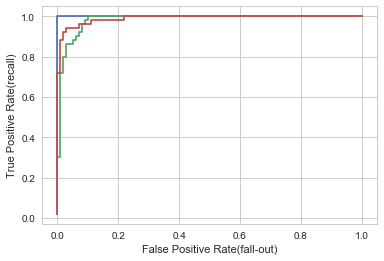

In [76]:
for i in range(3):
    model = GaussianNB().fit(x,y[:,i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:,i], model.predict_proba(x)[:,1])
    plt.plot(fpr[i], tpr[i])
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")
plt.show()

In [74]:
model.predict_proba(x)

array([[  6.84564194e-010,   9.99999999e-001],
       [  3.91649152e-009,   9.99999996e-001],
       [  1.02806340e-009,   9.99999999e-001],
       [  2.70946461e-009,   9.99999997e-001],
       [  2.95377047e-010,   1.00000000e+000],
       [  3.63458246e-008,   9.99999964e-001],
       [  9.94866861e-010,   9.99999999e-001],
       [  1.31755066e-009,   9.99999999e-001],
       [  3.95142012e-009,   9.99999996e-001],
       [  4.01121911e-009,   9.99999996e-001],
       [  1.36682030e-009,   9.99999999e-001],
       [  1.84495787e-009,   9.99999998e-001],
       [  3.15469153e-009,   9.99999997e-001],
       [  4.97223219e-009,   9.99999995e-001],
       [  1.98388395e-009,   9.99999998e-001],
       [  1.30431513e-009,   9.99999999e-001],
       [  2.96220437e-009,   9.99999997e-001],
       [  1.60419028e-009,   9.99999998e-001],
       [  7.59168776e-008,   9.99999924e-001],
       [  4.95239342e-010,   1.00000000e+000],
       [  4.43241746e-008,   9.99999956e-001],
       [  4.7

- decision_function() : 해당 데이터의 판별함수값(?)을 보여준다.
- predict() : decision_function()값이 양수라면 1, 음수면 0로 y_hat을 구해준다.
- predict_proba(): columns을 기준으로 개별데이터가 class0(column=0)에 속할 확률, class1(column=1)에 속할 확률을 보여줌. 큰값에 해당하는 걸 predict()로 뽑는다.

In [81]:
model1.predict_proba(x)

array([[ 0.99732879,  0.00267121],
       [ 0.99879266,  0.00120734],
       [ 0.91814628,  0.08185372],
       ..., 
       [ 0.99040301,  0.00959699],
       [ 0.9919704 ,  0.0080296 ],
       [ 0.9770772 ,  0.0229228 ]])